### p71 2,3,5 🫡

In [8]:
import torch


# 2
x = torch.arange(4.0)

print(f"x: {x}\n")

x.requires_grad_(True)
print(f"x.grad : {x.grad}\n")

y = 2 * torch.dot(x,x)
print(f"y: {y}\n")

y.backward()


print(f"x.grad : {x.grad}\n")

y = x.sum()
y.backward()
print(f"x.grad : {x.grad}\n")







x: tensor([0., 1., 2., 3.])

x.grad : None

y: 28.0

x.grad : tensor([ 0.,  4.,  8., 12.])

x.grad : tensor([ 1.,  5.,  9., 13.])



In [3]:
#3 
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

a = torch.randn(size=(3,4), requires_grad=True)
d = f(a)
d.sum().backward() #d.backward()


print(f"a.grad: {a.grad} a.grad = d/a ? {a.grad == d/a}\n")


a.grad: tensor([[512., 512., 512., 512.],
        [512., 512., 512., 512.],
        [512., 512., 512., 512.]]) a.grad = d/a ? tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])



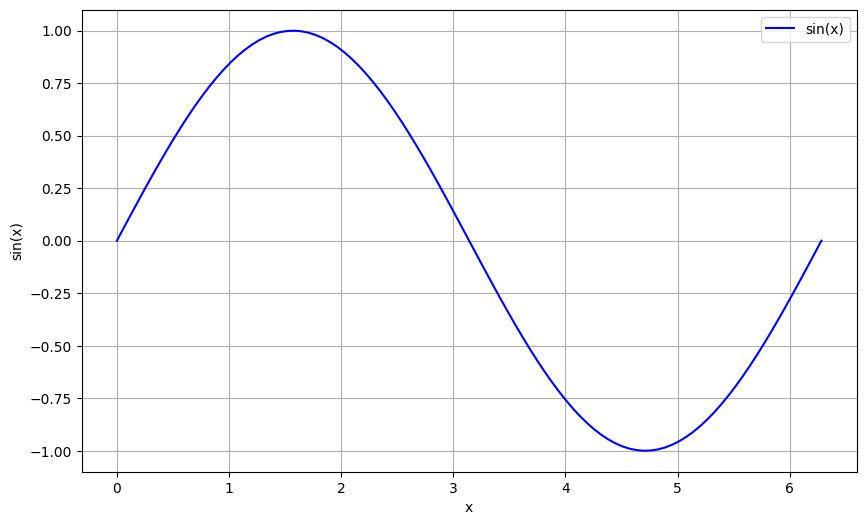

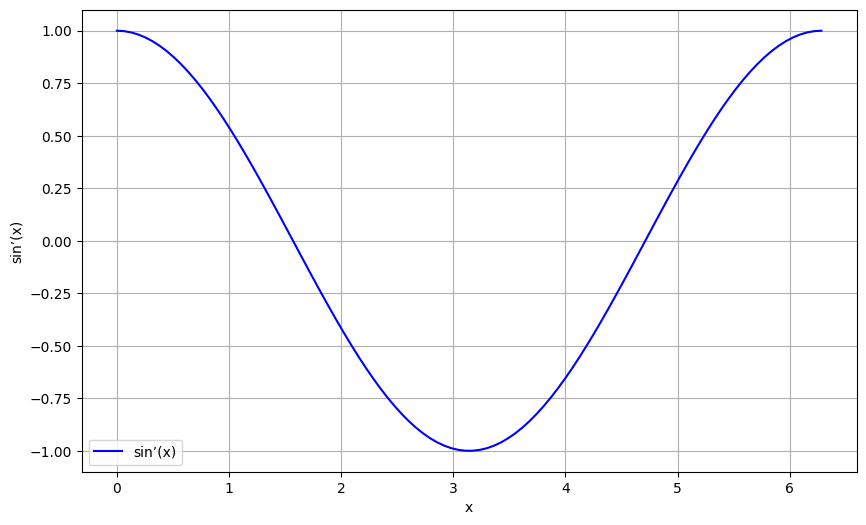

RuntimeError: expand(torch.FloatTensor{[100]}, size=[]): the number of sizes provided (0) must be greater or equal to the number of dimensions in the tensor (1)

In [9]:
#5 
import numpy as np
import matplotlib.pyplot as plt

# 生成 x 值，范围从 0 到 2π，共 100 个点
x = np.linspace(0, 2 * np.pi, 100)


y = np.sin(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='sin(x)', color='blue')

plt.xlabel('x')
plt.ylabel('sin(x)')

plt.grid(True)
plt.legend()
plt.show()


x_tensor = torch.tensor(x, dtype=torch.float32)
x_tensor.requires_grad_(True)
y_tensor = torch.sin(x_tensor)

y_tensor.sum().backward() #自动微分

x_grad_np = x_tensor.grad.numpy()


# print(f"x_tensor.grad: {x_tensor.grad}\n")

plt.figure(figsize=(10, 6))
plt.plot(x, x_grad_np, label='sin’(x)', color='blue')

plt.xlabel('x')
plt.ylabel('sin’(x)')

plt.grid(True)
plt.legend()
plt.show()


#数值微分
def backward_difference(f, x, h=1e-5):
    grad = torch.zeros_like(x)
    for i in range(x.size(0)):
        x_minus_h = x.clone()
        x_minus_h[i] -= h
        grad[i] = (f(x) - f(x_minus_h).sum()) / h
    return grad

dy_dx_backward_np = backward_difference(lambda x: torch.sin(x), x_tensor).numpy()

plt.figure(figsize=(10, 6))
plt.plot(x, dy_dx_backward_np, label='sin’(x)', color='blue')

plt.xlabel('x')
plt.ylabel('sin’(x)')

plt.grid(True)
plt.legend()
plt.show()




### 处理房价预测数据集 🏘️